In [20]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [2]:

df = pd.read_csv('str/JAPON.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       20000 non-null  int64  
 1   Month      20000 non-null  int64  
 2   Day        20000 non-null  int64  
 3   Time       20000 non-null  object 
 4   Lat        20000 non-null  float64
 5   Lon        20000 non-null  float64
 6   Depth      20000 non-null  float64
 7   Mag        20000 non-null  float64
 8   Region     20000 non-null  object 
 9   Timestamp  20000 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.5+ MB


In [6]:
# Convertir el campo 'Time' en un objeto datetime y crear una nueva columna 'Fecha'
df['Time'] = pd.to_datetime(df['Time'])
df['Fecha'] = df['Time'].dt.date


In [7]:

#  Convertir los campos Year, Month y Day en una nueva columna 'Fecha' en formato datetime
df['Fecha'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Convertir la columna 'Time' en un objeto datetime y agregarla a la columna 'Fecha'
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')
df['Fecha'] = df['Fecha'] + pd.to_timedelta(df['Time'].dt.strftime('%H:%M:%S.%f'))

# Eliminar las columnas Year, Month, Day y Time
df = df.drop(['Year', 'Month', 'Day', 'Time'], axis=1)

# Convertir la columna 'Fecha' en formato ISO 8601 (YYYY-MM-DD)
df['Fecha'] = df['Fecha'].dt.strftime('%Y-%m-%d')

In [8]:
df = df.rename(columns={'Mag': 'Magnitud','Depth':'profundidad'})

In [10]:

# Filtrar las filas que contienen la palabra 'japon' en la columna 'Region'
filtro = df['Region'].str.contains('japan', case=False)
df = df[filtro]

# Limpiar la columna 'Region' eliminando información redundante
df['Region'] = df['Region'].str.replace('Earthquake', '').str.strip()


In [33]:
# Aplicar normalización de datos a las columnas 'Lat' y 'Lon'
df['Lat'] = (df['Lat'] - df['Lat'].mean()) / df['Lat'].std()
df['Lon'] = (df['Lon'] - df['Lon'].mean()) / df['Lon'].std()

In [11]:
df.head(10)

,Lat,Lon,profundidad,Magnitud,Region,Timestamp,Fecha
0,41.5046,141.9956,62.3,5.9,"Hokkaido, Japan region",1683308836,2023-05-05
1,42.8976,146.1596,35.6,4.5,"off the coast of Hokkaido, Japan",1683302508,2023-05-05
2,37.5061,137.2217,10.6,4.4,"41 km NE of Anamizu, Japan",1683296330,2023-05-05
3,37.4932,137.2783,8.2,5.6,"44 km NE of Anamizu, Japan",1683291483,2023-05-05
4,39.4271,141.9658,61.8,4.7,"4 km SSE of Yamada, Japan",1683289494,2023-05-05
5,37.4766,137.3960,10.0,4.6,"near the west coast of Honshu, Japan",1683275881,2023-05-05
6,37.5402,137.3053,8.7,6.2,"49 km NE of Anamizu, Japan",1683265324,2023-05-05
8,41.7029,144.3003,31.0,4.5,"105 km SE of Hiroo, Japan",1683079996,2023-05-03
10,37.8458,141.8161,50.4,4.2,"near the east coast of Honshu, Japan",1682967376,2023-05-01
11,42.0419,142.5182,71.9,4.5,"25 km WSW of Urakawa, Japan",1682899100,2023-04-30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17018 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lat          17018 non-null  float64
 1   Lon          17018 non-null  float64
 2   profundidad  17018 non-null  float64
 3   Magnitud     17018 non-null  float64
 4   Region       17018 non-null  object 
 5   Timestamp    17018 non-null  int64  
 6   Fecha        17018 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.0+ MB


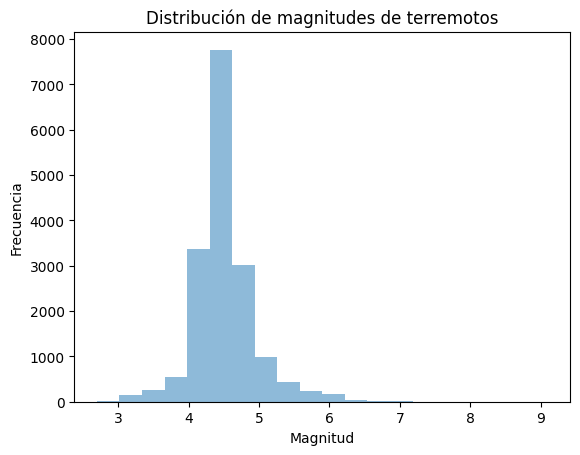

In [18]:
# Crear un histograma de la magnitud de los terremotos
plt.hist(df['Magnitud'], bins=20, alpha=0.5)
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de magnitudes de terremotos')
plt.show()

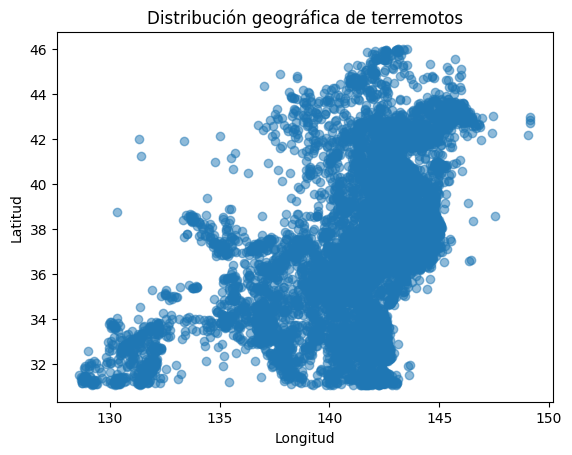

In [16]:
# Crear un gráfico de dispersión de la latitud y longitud de los terremotos
plt.scatter(df['Lon'], df['Lat'], alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica de terremotos')
plt.show()